# Sandbox

In [10]:
import CSET_data_classes as DC

In [2]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 6,2
import numpy as np
import matplotlib.pyplot as plt
import configuration as config
import lagrangian_case as case
import CSET_data_classes as DC
from scipy.io import loadmat
%load_ext autoreload
%autoreload 2
import utils


In [211]:
import matplotlib.pyplot as plt
import xarray as xr
import glob
import os
import utils

In [212]:
ens_files = [os.path.join(utils.ERA_ens_source, i) for i in sorted(os.listdir(utils.ERA_ens_source))]
data =  xr.open_mfdataset(sorted(ens_files))

In [213]:
data

<xarray.Dataset>
Dimensions:    (latitude: 101, level: 12, longitude: 303, number: 10, time: 496)
Coordinates:
  * longitude  (longitude) float64 -160.0 -159.7 -159.4 -159.1 -158.8 -158.5 ...
  * latitude   (latitude) float32 45.0 44.7 44.4 44.1 43.8 43.5 43.2 42.9 ...
  * number     (number) int32 0 1 2 3 4 5 6 7 8 9
  * time       (time) datetime64[ns] 2015-07-01 2015-07-01T03:00:00 ...
  * level      (level) int32 700 750 775 800 825 850 875 900 925 950 975 1000
Data variables:
    sp         (time, number, latitude, longitude) float32 dask.array<shape=(496, 10, 101, 303), chunksize=(248, 10, 101, 303)>
    w          (time, number, level, latitude, longitude) float32 dask.array<shape=(496, 10, 12, 101, 303), chunksize=(248, 10, 12, 101, 303)>
    r          (time, number, level, latitude, longitude) float32 dask.array<shape=(496, 10, 12, 101, 303), chunksize=(248, 10, 12, 101, 303)>
    t          (time, number, level, latitude, longitude) float32 dask.array<shape=(496, 10, 12, 101

In [6]:
data = xr.open_mfdataset(g[:1000], concat_dim='time', autoclose=True)

Actually, I think the issue is that open_mfdataset has a stupid default for dask, where it assumes each input file fits in memory, so if you're loading 50x12 files of 20GB each or whatever, it makes 20GB chunks. Worth playing around with the chunks arg to explicitly tell it to make smaller chunks.

/home/disk/p/jkcm/anaconda3/lib/python3.5/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


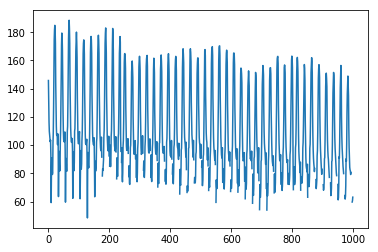

In [7]:
x = data.visible_count.mean(axis=(1,2))
plt.plot(x)

In [38]:
testcase = case.AircraftCase("ALC_RF02b-RF03cd")

In [47]:
test_sequence = DC.CSET_Flight_Sequence(start_time=1, end_time=2)

In [50]:
test_sequence.AVAPS_file_list

In [4]:
x = [np.arange(10,20), np.arange(10), np.arange(10)]

In [5]:
x

[array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])]

In [12]:
np.array(x).std(axis=0)

array([ 4.71404521,  4.71404521,  4.71404521,  4.71404521,  4.71404521,
        4.71404521,  4.71404521,  4.71404521,  4.71404521,  4.71404521])

In [13]:
288*287/9.8*np.log(1000/70
0)

1370.7310853640902

In [14]:
trajectory_file1 = r'/home/disk/eos4/jkcm/Data/CSET/Trajectories/rf10_rf11/analysis.UW_HYSPLIT_GFS.201507271620.airmass_trajectories_1000m_-48.txt'
trajectory_file2 = r'/home/disk/eos4/jkcm/Data/CSET/Trajectories/rf10_rf11/analysis.UW_HYSPLIT_GFS.201507271640.airmass_trajectories_1000m_-48.txt'
trajectory_file3 = r'/home/disk/eos4/jkcm/Data/CSET/Trajectories/rf10_rf11/analysis.UW_HYSPLIT_GFS.201507271700.airmass_trajectories_1000m_-48.txt'

/home/disk/p/jkcm/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/disk/p/jkcm/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/disk/p/jkcm/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


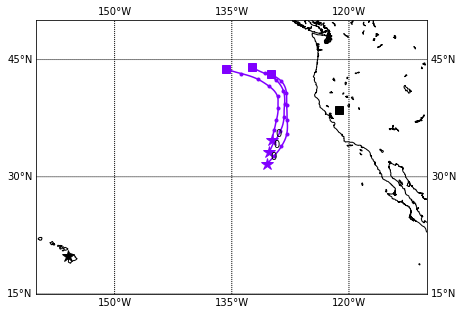

In [15]:
fig, ax, m = utils.make_map_plot()
utils.add_tdump_to_plot(m_ax=m, tdump=trajectory_file1)
utils.add_tdump_to_plot(m_ax=m, tdump=trajectory_file2)
utils.add_tdump_to_plot(m_ax=m, tdump=trajectory_file3)

In [18]:
import xarray as xr
import datetime as dt
import matplotlib.pyplot as plt

In [4]:
ds = xr.open_dataset(r'/home/disk/eos4/jkcm/Data/CSET/flight_data/RF11.20150729.163000_000800.PNI.nc')

In [7]:
start_time = dt.datetime(2015, 7, 29, 17, 30)
end_time = dt.datetime(2015, 7, 29, 19, 30)

In [15]:
x = ds.loc[dict(Time=slice(start_time,end_time))]

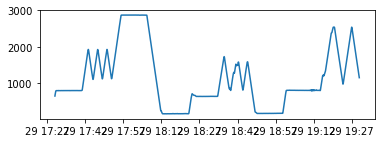

In [23]:
plt.plot(x.Time, x.GGALT)

In [43]:
f = {'x': [4],
    'y': [5,8],
    'z': [7, 3, 8]}

In [45]:
l = []
#[i for k,v in f.items() for i in v]

[item for k,sublist in f.items() for item in sublist]


[5, 8, 4, 7, 3, 8]

In [42]:
list(5)

TypeError: 'int' object is not iterable

In [20]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [27]:
data =  xr.open_dataset(r'/home/disk/eos4/jkcm/Data/CSET/model_forcings/case_rf10a-rf11de/rf10_ERA_data_5.5.nc')

In [28]:
MR = data.MR_adv
q = data.q_adv

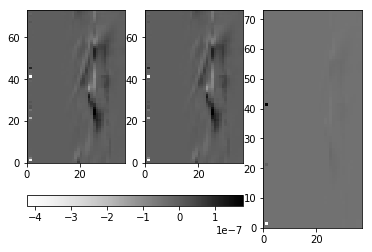

In [30]:
fig, [ax1, ax2, ax3] = plt.subplots(ncols=3)
vmin, vmax = np.nanmin(MR), np.nanmax(MR)
pc = ax1.pcolor(MR, vmin=vmin, vmax=vmax, cmap='Greys')
ax2.pcolor(q, vmin=vmin, vmax=vmax, cmap='Greys')
ax3.pcolor(MR-q, cmap='Greys')
plt.colorbar(pc, ax=[ax1, ax2], orientation='horizontal')

In [1]:
import utils

In [2]:
flight, number = 6, 2.3
fwd = utils.load_flight_trajectory(flight, number, trajectory_type='500m_+72')
bwd = utils.load_flight_trajectory(flight, number, trajectory_type='500m_-48')

In [4]:
bwd#.sort_values('dtime')

,tnum,gnum,fhour,age,lat,lon,height,pres
dtime,,,,,,,,
2015-07-15 17:00:00,1,1,1,-48.0,47.479,-135.222,468.2,967.7
2015-07-15 18:00:00,1,1,0,-47.0,47.454,-134.944,468.9,966.1
2015-07-15 19:00:00,1,1,1,-46.0,47.427,-134.668,470.7,968.3
2015-07-15 20:00:00,1,1,2,-45.0,47.402,-134.409,472.8,968.8
2015-07-15 21:00:00,1,1,3,-44.0,47.373,-134.169,474.4,967.1
2015-07-15 22:00:00,1,1,2,-43.0,47.342,-133.940,475.4,966.1
2015-07-15 23:00:00,1,1,1,-42.0,47.310,-133.719,475.2,967.8
2015-07-16 00:00:00,1,1,0,-41.0,47.277,-133.510,470.4,970.7
2015-07-16 01:00:00,1,1,1,-40.0,47.239,-133.312,463.8,969.7


In [16]:
from unified_traj_data import *
from math import tan

In [8]:
ds = make_trajectory(rfnum='rf06', trajnum=2.3, save=False)


adding ERA...
adding advection...
adding ERA sfc data...
adding MODIS...
adding ERA ensemble...


In [99]:
# def add_upwind_profile_to_trajectory(ds, dist=200, box_degrees=2):
dist=200
box_degrees=2

if True:
    """Add 'upwind' profile (not a true profile since the location varies with height)
    for alternative nudging method.
    Add only T_upwind, q_upwind, and MR_upwind vars
    """
    var_dict = {'t': np.full_like(ds.ERA_t, np.nan),
                'q': np.full_like(ds.ERA_q, np.nan),
                'MR': np.full_like(ds.ERA_MR, np.nan)}
    lat_upwind = np.full_like(ds.ERA_t, np.nan)
    lon_upwind = np.full_like(ds.ERA_t, np.nan)

    times = ds.time.values
    space_index = int(np.round(box_degrees/0.3/2)) # go up/down/left/right this many pixels
    unique_days = set([utils.as_datetime(i).date() for i in times])
    files = [os.path.join(utils.ERA_source, "ERA5.pres.NEP.{:%Y-%m-%d}.nc".format(i))
             for i in unique_days]
    with xr.open_mfdataset(sorted(files)) as data:
        
        #adding in q:
        T = data['t'].values 
        RH = data['r'].values
        p = np.broadcast_to(data.coords['level'].values[None, :, None, None], T.shape)*100
        q = utils.qv_from_p_T_RH(p, T, RH)
        data['q'] = (('time', 'level', 'latitude', 'longitude'), q)
        data['q'] = data['q'].assign_attrs({'units': "kg kg**-1", 
                                'long_name': "specific_humidity",
                                'dependencies': 'ERA_t, ERA_p, ERA_r'})
        MR = q/(1-q)
        data['MR'] = (('time', 'level', 'latitude', 'longitude'), MR)
        data['MR'] = data['MR'].assign_attrs({'units': "kg kg**-1", 
                                'long_name': "mixing_ratio",
                                'dependencies': 'ERA_t, ERA_p, ERA_r'})
        
        for i, t in enumerate(ds.time):
            lat = ds.lat.sel(time=t).values
            lon = ds.lon.sel(time=t).values
            for j, l in enumerate(ds.level):
                u = ds.ERA_u.sel(time=t, level=l).values
                v = ds.ERA_v.sel(time=t, level=l).values
                azi = np.rad2deg(np.arctan2(-u, -v)) ##MINUS SIGNS FOR GOING UPWIND
                dist_m = dist*1000
                gd = Geodesic.WGS84.Direct(lat1=lat, lon1=lon, azi1=azi, s12=dist_m)
                lat2, lon2 = gd['lat2'], gd['lon2']%360
                lat_upwind[i, j] = lat2
                lon_upwind[i, j] = lon2
                
                            
                for var, arr in var_dict.items():
                    if lat2 > np.max(data.coords['latitude']) or lat2 < np.min(data.coords['latitude']) or \
                        lon2 > np.max(data.coords['longitude']) or lon2 < np.min(data.coords['longitude']):
                        print('out of range of data')
                        print(lat, lon)
                        print(lat2, lon2)
                        print(np.max(data.coords['latitude']))
                        arr[i,j] = float('nan')            
                        continue
                                    
                    x = data[var].sel(longitude=slice(lon2 - box_degrees/2, lon2 + box_degrees/2),
                                      latitude=slice(lat2 + box_degrees/2, lat2 - box_degrees/2))
                    y = x.sel(method='nearest', tolerance=np.timedelta64(1, 'h'), time=t)
                    z = y.sel(level=l)
                    #z = y.sel(method='nearest', tolerance=50, level=pres)
                    #this applies a 2D gaussian the width of z, i.e. sigma=box_degrees
                    gauss = utils.gauss2D(shape=z.shape, sigma=z.shape[0])
                    filtered = z.values * gauss
                    arr[i,j] = np.sum(filtered)
                    
                
        for var, arr in var_dict.items():
            var_attrs = data[var].attrs
            var_attrs['long_name'] = "{}, {}km upwind, {}-deg average".format(data['t'].attrs['long_name'].lower(), dist, box_degrees)
            ds['ERA_{}_upwind'.format(var)] = (('time', 'level'), arr, var_attrs)
            
        ds['ERA_lat_upwind'] = (('time', 'level'), lat_upwind, {"long_name": "Upwind latitude", "units": "deg_N"})
        ds['ERA_lon_upwind'] = (('time', 'level'), lon_upwind, {"long_name": "Upwind longitude", "units": "deg_E"})
#     return ds
                
                
                
                
                
            
# add_upwind_profile_to_trajectory(ds, dist=200, box_degrees=2)

In [90]:
data['t'].attrs['long_name'] = "{}, {}km upwind, {}-deg average".format(data['t'].attrs['long_name'].lower(), dist, box_degrees)

In [97]:
ds

<xarray.Dataset>
Dimensions:            (ens_level: 12, level: 37, number: 10, time: 73)
Coordinates:
  * time               (time) datetime64[ns] 2015-07-17T17:00:00 ...
  * level              (level) float64 1.0 2.0 3.0 5.0 7.0 10.0 20.0 30.0 ...
  * number             (number) int32 0 1 2 3 4 5 6 7 8 9
  * ens_level          (ens_level) int32 700 750 775 800 825 850 875 900 925 ...
Data variables:
    fhour              (time) int64 1 0 1 2 3 2 1 0 1 2 3 2 1 0 1 2 3 2 1 0 ...
    lat                (time) float64 34.79 34.47 34.15 33.85 33.55 33.25 ...
    lon                (time) float64 -137.2 -137.5 -137.9 -138.2 -138.5 ...
    height             (time) float64 500.0 494.3 487.2 479.9 477.0 476.2 ...
    pres               (time) float64 967.4 966.0 967.3 967.7 968.0 967.5 ...
    traj_u             (time) float64 -8.6 -8.613 -8.594 -8.549 -8.591 ...
    traj_v             (time) float64 -9.877 -9.799 -9.598 -9.351 -9.15 ...
    traj_hdg           (time) float64 -139.0 -138.7 -1

In [52]:
lat = 30
lon = -135
u = -1
v = 1
azi = np.rad2deg(np.arctan2(u, v))
s12 = 200*1000
gd = Geodesic.WGS84.Direct(lat1=lat, lon1=lon, azi1=azi, s12=s12)
lat2, lon2 = 

In [54]:
gd['lat2']

31.26726746056686

In [105]:
from numpy import random
from scipy.stats import linregress

In [129]:
x = list(np.random.randn(5))# + [10]
y = list(np.random.randn(5))# + [9]

In [130]:
linregress(x,y)

LinregressResult(slope=0.233272876695027, intercept=-0.966094220184412, rvalue=0.4481898537007239, pvalue=0.4490733769709519, stderr=0.26862670696144325)

In [131]:
np.std(x)

1.1725238344923572

In [132]:
np.std(y)

0.6102726458599305

In [133]:
np.cov(x,y)

array([[1.718515, 0.400883],
       [0.400883, 0.465541]])

In [1]:
from unified_traj_data import *

In [6]:
def add_speeds_to_trajectories(ds):
    """Add speed variables to trajectory. used centered difference of distances traveled
    """
    lats, lons, times = ds.lat.values, ds.lon.values, ds.time.values
    
    heading_starts, heading_ends, seg_speeds = [], [], []
    
    for i in range(len(lats)-1):
        geod = Geodesic.WGS84.Inverse(lats[i], lons[i], lats[i+1], lons[i+1])
        dtime = (times[i+1]-times[i])/np.timedelta64(1, 's')
        heading_starts.append(geod['azi1'])
        heading_ends.append(geod['azi2'])
        seg_speeds.append(geod['s12']/dtime)

    #speeds are centered difference, except at start and end, where they are speeds of 
    #first and last trajectory segments
    #headings are average of end azimuth of previous segment/start azimuth of next geodesic segment,
    #except at start and end, where are just the start/end azimuths of the first/last geodesic
    speeds = np.mean(np.vstack([seg_speeds+[seg_speeds[-1]],[seg_speeds[0]]+seg_speeds]), axis=0)
    headings = np.mean(np.vstack([[heading_starts[0]]+heading_ends, heading_starts+[heading_ends[-1]]]), axis=0)
    
    u = speeds*np.cos(np.deg2rad(90-headings))
    v = speeds*np.sin(np.deg2rad(90-headings))
    
    ds['traj_u_new'] = (('time'), u)
    ds['traj_v_new'] = (('time'), v)
    ds['traj_hdg'] = (('time'), headings)
    ds['traj_spd'] = (('time'), speeds)
    return ds


In [64]:
rfnum = 'rf06'
trajnum = 3.0
trajectory_type = '500m_-48'
ds = xarray_from_trajectory(rfnum, trajnum, trajectory_type)
# ds = add_speeds_to_trajectories(ds)
if True:
    """Add speed variables to trajectory. used centered difference of distances traveled
    """
    lats, lons, times = ds.lat.values, ds.lon.values, ds.time.values
    
    heading_starts, heading_ends, seg_speeds = [], [], []
    
    for i in range(len(lats)-1):
        geod = Geodesic.WGS84.Inverse(lats[i], lons[i], lats[i+1], lons[i+1])
        dtime = (times[i+1]-times[i])/np.timedelta64(1, 's')
        heading_starts.append(geod['azi1'])
        heading_ends.append(geod['azi2'])
        seg_speeds.append(geod['s12']/dtime)

    #speeds are centered difference, except at start and end, where they are speeds of 
    #first and last trajectory segments
    #headings are average of end azimuth of previous segment/start azimuth of next geodesic segment,
    #except at start and end, where are just the start/end azimuths of the first/last geodesic
    speeds = np.mean(np.vstack([seg_speeds+[seg_speeds[-1]],[seg_speeds[0]]+seg_speeds]), axis=0)
    
    def radial_mean(h1, h2):
        diff = ((h2-h1)+180)%360-180
        return h1 + diff/2
    headings = radial_mean(np.array([heading_starts[0]]+heading_ends), np.array(heading_starts+[heading_ends[-1]]))
    headings_old = np.mean(np.vstack([[heading_starts[0]]+heading_ends, heading_starts+[heading_ends[-1]]]), axis=0)
    
    u = speeds*np.cos(np.deg2rad(90-headings))
    v = speeds*np.sin(np.deg2rad(90-headings))
    
    ds['traj_u_new'] = (('time'), u)
    ds['traj_v_new'] = (('time'), v)
    ds['traj_hdg'] = (('time'), headings)
    ds['traj_spd'] = (('time'), speeds)


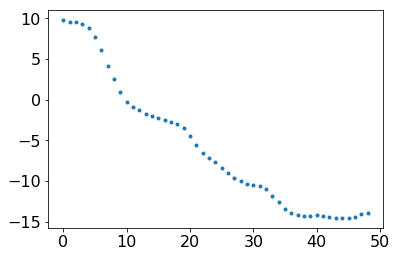

In [69]:
plt.plot(v, '.')


In [58]:
h1 = np.array([-1, 89, 179, -91])
h2 = np.array([1, 91, -179, -89])
def radial_mean(h1, h2):
    diff = ((h2-h1)+180)%360-180
    return h1 + diff/2

# print("current:", np.mean(np.vstack([[h1%360, h2%360]]), axis=0).astype(int))
print("current:", radial_mean(h1, h2))
print("correct:", np.array([0, 90, 180, -90]))


current: [  0.  90. 180. -90.]
correct: [  0  90 180 -90]


In [56]:
((h2-h1)+180)%360-180

array([2, 2, 2, 2])

In [ ]:
diff = ( ( a - b + 180 + 360 ) mod 360 ) - 180
angle = (360 + b + ( diff / 2 ) ) mod 360

In [18]:
#video for bruce
import os
from shutil import copy
l1 = r'/home/disk/eos4/jkcm/Data/CSET/camera/RF10/jpg'
l2 = r'/home/disk/eos4/jkcm/Data/CSET/camera/RF10/bruce_video'
files = os.listdir(l1)
print(files[0])
for f in files:
    time = int(f[7:13])
    if (time>160800 and time<194800):
        copy(os.path.join(l1, f), l2)

150727-150050.jpg


In [4]:
files

['150727-150050.jpg',
 '150727-150051.jpg',
 '150727-150052.jpg',
 '150727-150053.jpg',
 '150727-150054.jpg',
 '150727-150055.jpg',
 '150727-150056.jpg',
 '150727-150057.jpg',
 '150727-150058.jpg',
 '150727-150059.jpg',
 '150727-150100.jpg',
 '150727-150101.jpg',
 '150727-150102.jpg',
 '150727-150103.jpg',
 '150727-150104.jpg',
 '150727-150105.jpg',
 '150727-150106.jpg',
 '150727-150107.jpg',
 '150727-150108.jpg',
 '150727-150109.jpg',
 '150727-150110.jpg',
 '150727-150111.jpg',
 '150727-150112.jpg',
 '150727-150113.jpg',
 '150727-150114.jpg',
 '150727-150115.jpg',
 '150727-150116.jpg',
 '150727-150117.jpg',
 '150727-150118.jpg',
 '150727-150119.jpg',
 '150727-150120.jpg',
 '150727-150121.jpg',
 '150727-150122.jpg',
 '150727-150123.jpg',
 '150727-150124.jpg',
 '150727-150125.jpg',
 '150727-150127.jpg',
 '150727-150128.jpg',
 '150727-150129.jpg',
 '150727-150130.jpg',
 '150727-150131.jpg',
 '150727-150132.jpg',
 '150727-150133.jpg',
 '150727-150134.jpg',
 '150727-150135.jpg',
 '150727-1

In [21]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

In [114]:
file = r'/home/disk/eos4/jkcm/Data/CSET/GOES/flight_trajectories/data/rf06_rf07-2.3-1deg.nc'
title = 'rf06-rf07-traj2.3-1deg-lwp-var'
file = r'/home/disk/eos4/jkcm/Data/CSET/GOES/flight_trajectories/data/rf10_rf11-6.0-1deg.nc'
title = 'rf10-rf11-traj6.0-1deg-lwp-var'
with xr.open_dataset(file) as data:
    lwp = data.cloud_lwp
    time = data.time
    lon = data.longitude
    lat = data.latitude

/home/disk/p/jkcm/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/home/disk/p/jkcm/anaconda3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:1283: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


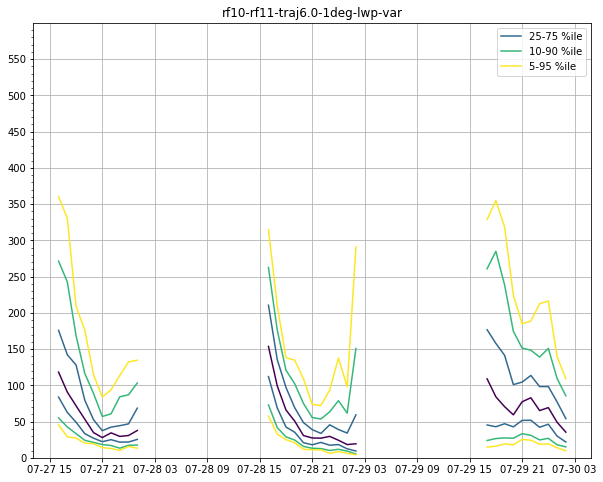

In [115]:
median = np.nanmedian(lwp, axis=(1,2))


fig, ax = plt.subplots(figsize=(10,8))
colors = [cm.get_cmap('viridis')(i) for i in np.linspace(0,1,4)]
ax.plot(time, median, color=colors[0])
for i,off in enumerate([25, 40, 45]):
    ax.plot(time, np.nanpercentile(lwp, 50+off, axis=(1,2)), color=colors[i+1], 
             label="{}-{} %ile".format(50-off, 50+off))
    ax.plot(time, np.nanpercentile(lwp, 50-off, axis=(1,2)), color=colors[i+1])
ax.legend()
ax.grid(True)
ax.set_title(title)
ax.set_ylim((0, 600))
ax.set_yticks(np.arange(0, 600, 50))
ax.set_yticks(np.arange(0, 600, 10), minor=True);
fig.savefig(r"/home/disk/p/jkcm/plots/cset_lagrangian/{}.png".format(title))
# np.nanpercentile(lwp, 95, axis=(1,2))

In [116]:
pix_dx = np.gradient(lon, axis=(2))*np.cos(np.deg2rad(lat.values))*111.321

In [117]:
pix_dy = -np.gradient(lat, axis=(1))*111.321

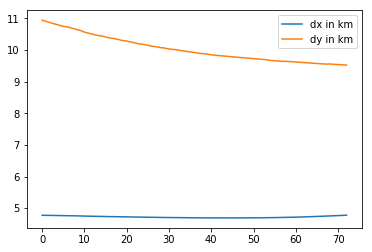

In [118]:
plt.plot(np.mean(pix_dx, axis=(1,2)), label='dx in km')
plt.plot(np.mean(pix_dy, axis=(1,2)), label='dy in km')
plt.legend()

In [119]:
np.mean(np.gradient(lat, axis=(1)), axis=(1,2))

array([-0.09829111, -0.09793538, -0.09758212, -0.09723632, -0.09689305,
       -0.09655468, -0.09638591, -0.09605465, -0.09572572, -0.09540146,
       -0.09492572, -0.09461074, -0.09430228, -0.09399626, -0.09384384,
       -0.09354437, -0.09324912, -0.09310219, -0.0928147 , -0.09252956,
       -0.09238775, -0.09210872, -0.09183335, -0.09156182, -0.09142603,
       -0.09116008, -0.0908969 , -0.09076595, -0.09050835, -0.0903797 ,
       -0.0901281 , -0.09000239, -0.08987831, -0.08963319, -0.08951148,
       -0.08927156, -0.08915275, -0.08891782, -0.08880191, -0.08868669,
       -0.08845885, -0.08834693, -0.08823544, -0.08812562, -0.08801626,
       -0.0879077 , -0.08780087, -0.08769433, -0.0875895 , -0.0874857 ,
       -0.08738388, -0.08728202, -0.08718248, -0.08708401, -0.08688238,
       -0.08678687, -0.0866939 , -0.08660069, -0.08661042, -0.08651886,
       -0.08643013, -0.08634073, -0.08625441, -0.08617156, -0.08608772,
       -0.08600526, -0.0859238 , -0.08584355, -0.08585961, -0.08

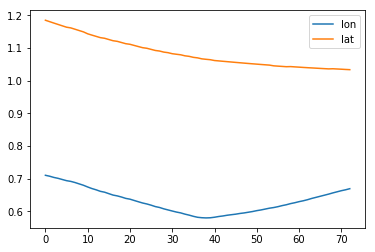

In [120]:
plt.plot(np.max(lon, axis=(1,2)) - np.min(lon, axis=(1,2)), label='lon')
plt.plot(np.max(lat, axis=(1,2)) - np.min(lat, axis=(1,2)), label='lat')
plt.legend()

# plt.plot()

In [134]:
import xarray as xr
file = r'/home/disk/eos4/jkcm/Data/CSET/GOES/VISST_pixel/G15V03.0.NH.2015243.0400.PX.08K.NC'
data = xr.open_dataset(file)

In [135]:
lats = data.latitude.values
lons = data.longitude.values

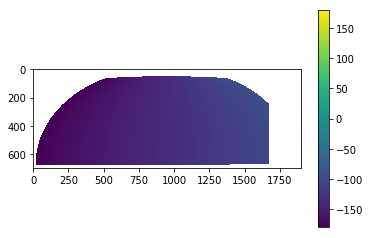

In [144]:
import matplotlib.pyplot as plt
plt.imshow(lons)
plt.colorbar()

In [197]:
mask = np.logical_and(np.logical_and(lats<50,lats>15), np.logical_and(lons>-160, lons<-110))

/home/disk/p/jkcm/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':
/home/disk/p/jkcm/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


In [198]:
lats_grad = np.gradient(lats)[0]
lons_grad = np.gradient(lons)[1]
lats_m = lats_grad[mask]
lons_m = lons_grad[mask]

In [199]:
mean_space = (-np.nanmean(lats_m) + np.nanmean(lons_m))/2

In [206]:
5/mean_space

67.89117399797871

In [202]:
13*5

65

In [203]:
27*2.5

67.5

In [ ]:
(6, '1deg')
(13, '2deg')
(27, '4deg')